This script shows the time difference in days for a series of satellite images downloaded on a computer and creates Fig. 6.6 of the thesis.

In [1]:
import pandas as pd
import os
from os import walk
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

set path to satellite images

In [2]:
path='path_to_satellite_images'

extract image dates of satellite images in folder, create datetime objects and calculate time differences

In [3]:
# build empty lists

f=[]
dates=[]
date_str = []
dates =[]
time_diff_days=[]

# fill in satellite images names in empty list

for item in walk(path):
    f.extend(item)

# extract filenames from items in 'f'

filenames_list=f[2]

# extract actual dates from items in 'filnames_list'

for filename in filenames_list:
    item=filename.split('.')[0]
    date_str.append(item)
    
# make datetime objects
    
for item in date_str:
    dates.append(datetime.strptime(item,'%Y%m%d'))

# calculate time differences between datetime objects

time_diff_delta = np.diff(dates)

for item in time_diff_delta:
    time_diff_days.append(item.days)

time_diff_days.insert(0,float('nan'))

plot time differences between images vs image dates and insert launch date of Sentinel-2B satellite

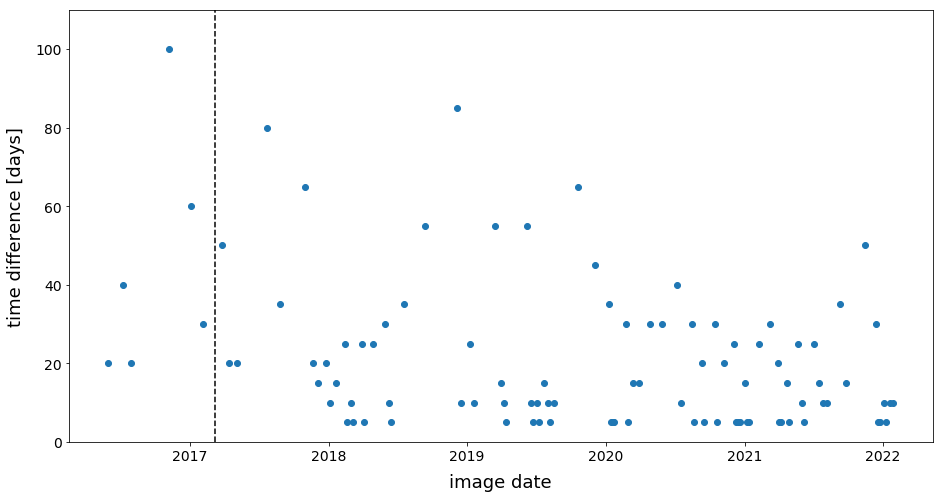

In [4]:

# launch of Sentinel-2B
launch_date = '20170307'
launch_date = datetime.strptime(launch_date,'%Y%m%d')

# plot time differences and launch date of Sentinel-2B
fig=plt.figure()
ax = fig.add_axes([0.1,0.1,2,1.5])
ax.set_xlabel('image date',fontsize=18,labelpad=10)
plt.xticks(fontsize=14)
ax.set_ylabel('time difference [days]',fontsize=18,labelpad=10)
plt.yticks(fontsize=14)
ax.plot(dates,time_diff_days,linestyle='None',marker='o')
plt.ylim((0,110))

plt.vlines(launch_date,0,110,linestyles='dashed')

plt.show()